In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import pickle
import cairo

## UCI datasets
Check: <https://archive.ics.uci.edu/ml/datasets.html?sort=nameUp&view=list>

Many of these are far too old... but some are hierarchical. Consider the following which are potentially hierarchical variable, but also pretty old.
**Cervical Cancer diagnosis**: <https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29>
**Car Evaluation Model**: <https://archive.ics.uci.edu/ml/datasets/Car+Evaluation>
**Nursery**: <https://archive.ics.uci.edu/ml/datasets/Nursery>

## PGM based

A promising one was <http://science.sciencemag.org/content/sci/353/6301/790.full.pdf>. But the ML part of it is that it uses a conv net on satellite imagery...

## Medical data
Scroll down to 3: EHR data - <https://github.com/beamandrew/medical-data>
Unfortunately, its not easy to get started on these.

## KDD datasets survey (circa 2000)
Refer to <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.445.4559&rep=rep1&type=pdf>

## El Nino Dataset (Promising, but have to do autoregression and cluster the buoys manually)
Reference: <https://archive.ics.uci.edu/ml/datasets/El+Nino>
tao_all2.missing must be per observation, starting at latitude/longitude.

Unfortunately, no labels are available - its more of a time series evolution kinda task

## Datasets continue after these few code blocks

In [40]:
base_dir = "data/elnino/"
elnino_file = "elnino"
with open(os.path.join(base_dir, "elnino.col")) as f:
    elnino_cols = [line.strip() for line in f]

elnino_df = pd.read_csv(os.path.join(base_dir, elnino_file), delim_whitespace=True, header=None)
elnino_df.columns = elnino_cols
print("Columns: {}".format(elnino_cols))

Columns: ['buoy', 'day', 'latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']


In [39]:
with open(os.path.join(base_dir, "tao-all2.col")) as f:
    tao_cols = [line.strip() for line in f]

tao_file = "tao-all2.dat"
tao_df = pd.read_csv(os.path.join(base_dir, tao_file), delim_whitespace=True, header=None)
tao_df.columns = tao_cols
print("Columns: {}".format(tao_cols))

Columns: ['obs', 'year', 'month', 'day', 'date', 'latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']


In [32]:
tao_missing_file = "tao-all2.missing"
tao_missing_df = pd.read_csv(os.path.join(base_dir, tao_missing_file), delim_whitespace=True, header=None)

In [38]:
print(tao_df.shape, tao_missing_df.shape)

(178080, 12) (178080, 8)


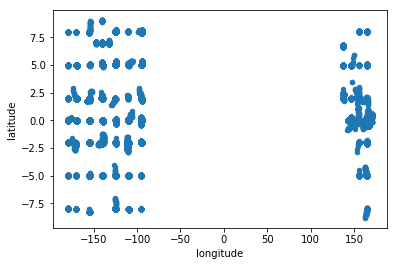

In [45]:
tao_df.plot.scatter('longitude', 'latitude')

## Google Flu Trends
> Obtain from <https://www.google.org/flutrends/about/>

Estimate of influenza per week per country.
Standard Task: Global estimation
Alternative task: Prediction for a country?

Suitable input data, unclear what the output should be. A baseline could be Vector Autoregression.

Con: Google Flu trend was bashed at one point for being inconsistent

## GHO
Essentially the same as Google Flu Trends, but for a lot more diseases.

## Geo-Spatial Dataset: Wind
Check corresponding section in <https://arxiv.org/pdf/1804.08562.pdf>. Currently unavailable due to government shutdown

# undesirable? - gridded data
## Precipitation data:
Obtained from <https://iridl.ldeo.columbia.edu/> by referring to <http://proceedings.mlr.press/v80/osama18a/osama18a.pdf>. Not too clear how to get it either.

## Geo-Spatial Dataset: Pacific Sea Temperature
Gridded sea temperatures. Check corresponding section in <https://arxiv.org/pdf/1804.08562.pdf>. Not suitable since there isn't a single output to predict. (Unless we want to use upsampling-FGL). Also appears in <http://proceedings.mlr.press/v80/osama18a/osama18a.pdf>

## Car Traffic Forecasting
Not gridded but the rest is ditto as above. Also not clear how to get the Beijing dataset... Its probably here <https://onedrive.live.com/?authkey=%21ADgmvTgfqs4hn4Q&cid=CF159105855090C5&id=CF159105855090C5%2141466&parId=CF159105855090C5%211438&action=defaultclick>

## Spatio-Temporal datasets
Information from: <http://faculty.missouri.edu/~wiklec/datasets.html>
**Eurasian Collared Dove Breeding Bird Survey Data**: Too small.
**Tropical Pacific Sea Surface Temperature**: Gridded, but also pretty small. Similar to the Pacific Sea Temperature dataset from a little earlier.
**Gridded Tornado Report Data**: 1836 locations, but only 49 values per location.

## Market trend prediction
Couldn't find any recent papers at ML conferences or sizable datasets.

### Not so clever dataset

In [46]:
import numpy as np
import torch
import skimage.draw as skdraw

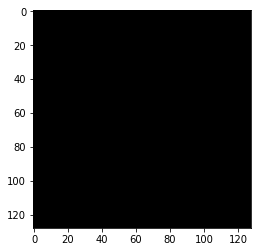

In [63]:
img = np.zeros((128, 128))
plt.imshow(img, cmap='gray')

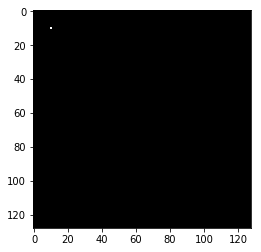

In [64]:
img = np.zeros((128, 128))
img[10, 10] = 1
plt.imshow(img, cmap='gray')

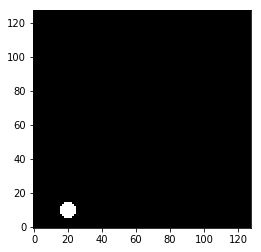

In [162]:
# circle
img = np.zeros((128, 128))
rr, cc = skdraw.circle(10, 20, 5)
img[rr, cc] = 1
# print(rr)
# print(cc)
plt.imshow(img, cmap='gray', origin='lower')


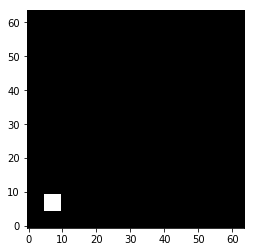

In [69]:
# square
img = np.zeros((64, 64))
rows = np.array([5, 5, 10, 10])
cols = np.array([5, 10, 10, 5])
rr, cc = skdraw.polygon(rows, cols)
img[rr, cc] = 1
plt.imshow(img, cmap='gray', origin='lower')

In [58]:
s = 128
l = 5
r = 4
xs, ys = np.meshgrid(list(range(s)), list(range(s)))

In [70]:
xys = np.reshape(np.stack([xs, ys], axis=-1), (-1, 2))

In [120]:
# Quadrant-like
s = 128
l = 3
r = 5

square_r = lambda x: x + np.array([- (l // 2), - (l // 2), l // 2, l // 2])
square_c = lambda y: y + np.array([-(l // 2), l // 2, l // 2, -(l // 2)])
circle_r = lambda x: x
circle_c = lambda y: y

xpos, ypos = np.meshgrid(list(range(s)), list(range(s)))
xypos = np.stack([xpos, ypos], axis=-1)

quadrants_dict = {
    0: np.logical_and(xpos < s//2, ypos < s//2),
    1: np.logical_and(xpos > s//2, ypos < s//2),
    2: np.logical_and(xpos > s//2, ypos > s//2),
    3: np.logical_and(xpos < s//2, ypos > s//2),
}

# Shapes have to present entirely within a quadrant for this to make sense.
valid_center = {
    'circle': {
        0: np.logical_and(
            quadrants_dict[0],
            np.logical_and(
                np.logical_and(xpos > r - 1, xpos < s // 2 - r + 1),
                np.logical_and(ypos > r - 1, ypos < s // 2 - r + 1),
            )
        ),
        1: np.logical_and(
            quadrants_dict[1],
            np.logical_and(
                np.logical_and(xpos > s // 2 + r - 1, xpos < s - r + 1),
                np.logical_and(ypos > r - 1, ypos < s // 2 - r + 1),
            )
        ),
        2: np.logical_and(
            quadrants_dict[2],
            np.logical_and(
                np.logical_and(xpos > s // 2 + r - 1, xpos < s - r + 1),
                np.logical_and(ypos > s // 2 + r - 1, ypos < s - r + 1),
            )
        ),
        3: np.logical_and(
            quadrants_dict[3],
            np.logical_and(
                np.logical_and(xpos > r - 1, xpos < s // 2 - r + 1),
                np.logical_and(ypos > s // 2 + r - 1, ypos < s - r + 1),
            )
        ),
    },
    'square': {
        0: np.logical_and(
            quadrants_dict[0],
            np.logical_and(
                np.logical_and(xpos > l - 1, xpos < s // 2 - l + 1),
                np.logical_and(ypos > l - 1, ypos < s // 2 - l + 1),
            )
        ),
        1: np.logical_and(
            quadrants_dict[1],
            np.logical_and(
                np.logical_and(xpos > s // 2 + l - 1, xpos < s - l + 1),
                np.logical_and(ypos > l - 1, ypos < s // 2 - l + 1),
            )
        ),
        2: np.logical_and(
            quadrants_dict[2],
            np.logical_and(
                np.logical_and(xpos > s // 2 + l - 1, xpos < s - l + 1),
                np.logical_and(ypos > s // 2 + l - 1, ypos < s - l + 1),
            )
        ),
        3: np.logical_and(
            quadrants_dict[3],
            np.logical_and(
                np.logical_and(xpos > l - 1, xpos < s // 2 - l + 1),
                np.logical_and(ypos > s // 2 + l - 1, ypos < s - l + 1),
            )
        ),
    },
}

valid_centers = {
    i: xypos[np.logical_or(
        np.logical_or(v[0], v[1]),
        np.logical_or(v[2], v[3]),
    )] for i, v in valid_center.items()
}

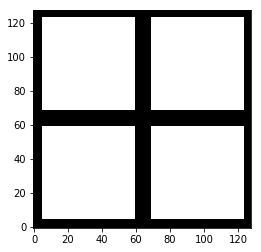

In [111]:
plt.imshow(valid_center['circle'], cmap='gray', origin='lower')

In [126]:
valid_centers['square']

array([[  3,   3],
       [  4,   3],
       [  5,   3],
       ...,
       [123, 125],
       [124, 125],
       [125, 125]])

In [117]:
quadrants = sum(i * v.astype(np.float) for i, v in quadrants_dict.items())

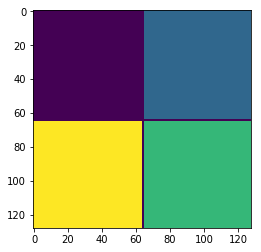

In [119]:
plt.imshow(quadrants)

### Take 2 at toy dataset

In [170]:
# Quadrant-like
s = 128
l = 9
r = 5

square_r = lambda x: x + np.array([- (l // 2), - (l // 2), l // 2, l // 2])
square_c = lambda y: y + np.array([-(l // 2), l // 2, l // 2, -(l // 2)])
circle_r = lambda x: x
circle_c = lambda y: y

ypos, xpos = np.meshgrid(list(range(s)), list(range(s)))
xypos = np.stack([xpos, ypos], axis=-1)

quadrants_dict = {
    0: np.logical_and(xpos < s//2, ypos < s//2),
    1: np.logical_and(xpos >= s//2, ypos < s//2),
    2: np.logical_and(xpos >= s//2, ypos >= s//2),
    3: np.logical_and(xpos < s//2, ypos >= s//2),
}
quadrants = sum(i * v.astype(np.float) for i, v in quadrants_dict.items())
# circle is more likely in quadrant 2 and less likely in quadrant 0.
# square is more likely in quadrant 0 and less in quadrant 2. 
# This
# Shapes have to present entirely within a quadrant for this to make sense.
# offset padding = 3
offpad = 6
valid_center = {
    'circle': {
        0: np.logical_and(
            quadrants_dict[0],
            np.logical_and(
                np.logical_and(xpos > r - 1 + offpad, xpos < s // 2 - r + 1 - offpad),
                np.logical_and(ypos > r - 1 + offpad, ypos < s // 2 - r + 1 - offpad),
            )
        ),
        1: np.logical_and(
            quadrants_dict[1],
            np.logical_and(
                np.logical_and(xpos > s // 2 + r - 1 + offpad // 2, xpos < s - r + 1 - offpad // 2),
                np.logical_and(ypos > r - 1 + offpad // 2, ypos < s // 2 - r + 1 - offpad // 2),
            )
        ),
        2: np.logical_and(
            quadrants_dict[2],
            np.logical_and(
                np.logical_and(xpos > s // 2 + r - 1, xpos < s - r + 1),
                np.logical_and(ypos > s // 2 + r - 1, ypos < s - r + 1),
            )
        ),
        3: np.logical_and(
            quadrants_dict[3],
            np.logical_and(
                np.logical_and(xpos > r - 1 + offpad // 2, xpos < s // 2 - r + 1 - offpad // 2),
                np.logical_and(ypos > s // 2 + r - 1 + offpad // 2, ypos < s - r + 1 - offpad // 2),
            )
        ),
    },
    'square': {
        0: np.logical_and(
            quadrants_dict[0],
            np.logical_and(
                np.logical_and(xpos > l // 2, xpos < s // 2 - l // 2),
                np.logical_and(ypos > l // 2, ypos < s // 2 - l // 2),
            )
        ),
        1: np.logical_and(
            quadrants_dict[1],
            np.logical_and(
                np.logical_and(xpos > s // 2 + l // 2 + offpad // 2, xpos < s - l // 2 - offpad // 2),
                np.logical_and(ypos > l // 2 + offpad // 2, ypos < s // 2 - l // 2 - offpad // 2),
            )
        ),
        2: np.logical_and(
            quadrants_dict[2],
            np.logical_and(
                np.logical_and(xpos > s // 2 + l // 2 + offpad, xpos < s - l // 2 - offpad),
                np.logical_and(ypos > s // 2 + l // 2 + offpad, ypos < s - l // 2 - offpad),
            )
        ),
        3: np.logical_and(
            quadrants_dict[3],
            np.logical_and(
                np.logical_and(xpos > l // 2 + offpad // 2, xpos < s // 2 - l // 2 - offpad // 2),
                np.logical_and(ypos > s // 2 + l // 2 + offpad // 2, ypos < s - l // 2 - offpad // 2),
            )
        ),
    },
}

In [171]:
sh = 'circle'
xypos[np.logical_or(np.logical_or(valid_center[sh][0], valid_center[sh][1]), np.logical_or(valid_center[sh][2], valid_center[sh][3]))].shape

(9676, 2)

In [172]:
9676 * 9676

93624976

In [168]:
a, b = np.array([1, 2])

In [175]:
quadrants[63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3.])

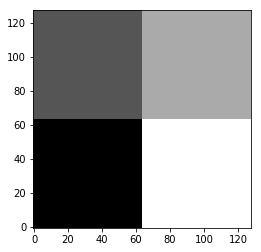

In [176]:
plt.imshow(quadrants / 4, cmap='gray', origin='lower')

In [182]:
xypos[10, 127]

array([ 10, 127])

In [183]:
from clevr import dataset as clevr_dset

ModuleNotFoundError: No module named 'clevr'

In [191]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F

onehots = np.pad(np.eye(3136).reshape((3136, 56, 56, 1)), ((0,0), (4,4), (4,4), (0,0)), "constant");
# images = F.conv2d(onehots, np.ones((9, 9, 1, 1)), stride=1, "SAME")


In [187]:
with tf.Session().as_default():
    images_np = (images.eval())
print(type(images_np))

<class 'numpy.ndarray'>


In [188]:
images_np.shape

(3136, 64, 64, 1)

In [202]:
onehots = np.pad(np.eye(3136).reshape((3136, 56, 56, 1)), ((0,0), (4,4), (4,4), (0,0)), "constant");
images_F = F.conv2d(torch.from_numpy(onehots).squeeze().unsqueeze(1).float(), torch.ones((1, 1, 9, 9)).float(), stride=1, padding=4)

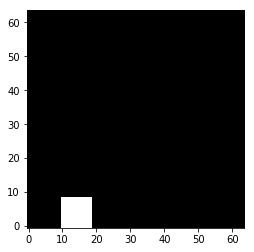

In [208]:
plt.imshow(images_F[10, 0].numpy(), cmap='gray', origin='lower')

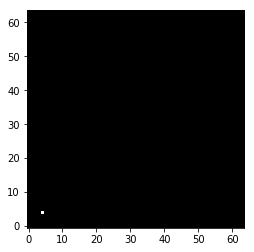

In [210]:
plt.imshow(onehots[0, :, :, 0], cmap='gray', origin='lower')

In [211]:
onehots[0, :, :, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
quadrants[onehots[0, :, :, 0].astype(bool)]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 128 but corresponding boolean dimension is 64

In [21]:
width, height = 255, 255
data = np.zeros(shape=(height, width, 4), dtype=np.uint8)
surface = cairo.ImageSurface.create_for_data(
    data, cairo.FORMAT_ARGB32, width, height)


In [22]:
cr = cairo.Context(surface)
cr.set_source_rgba(0.0, 0, 0.0, 1.0)
cr.move_to(90, 160)
cr.arc(90, 160, 40, 0, np.pi/4)
cr.close_path()
cr.fill()

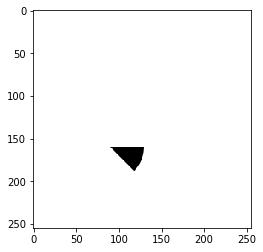

In [23]:
plt.imshow(data[:, :])#, 3], cmap='gray')

In [24]:
np.unique(data[:, :, 3] / 255)

array([0.        , 0.00392157, 0.02352941, 0.02745098, 0.06666667,
       0.07058824, 0.07843137, 0.11372549, 0.11764706, 0.23921569,
       0.27058824, 0.29019608, 0.31372549, 0.38431373, 0.41960784,
       0.43529412, 0.46666667, 0.50196078, 0.54901961, 0.56078431,
       0.56862745, 0.59607843, 0.68627451, 0.71764706, 0.76078431,
       0.8       , 0.82352941, 0.83137255, 0.85098039, 0.85882353,
       0.8745098 , 0.89019608, 0.89411765, 0.9254902 , 0.92941176,
       0.93333333, 0.97647059, 0.98823529, 0.99607843, 1.        ])

In [34]:
def wedge_adjacency(s, r, n_classes=8, complex=False):
    pibnc = np.pi / n_classes * (1 if complex else 2)
    img = np.zeros((s, s))
    adj = [[] for _ in range(n_classes + 1)]
    for c in range(n_classes):
        x = np.zeros((s, s, 4)).astype(np.uint8)
        surface = cairo.ImageSurface.create_for_data(
            x, cairo.FORMAT_ARGB32, s, s)
        cr = cairo.Context(surface)
        cr.set_source_rgba(0, 0, 0, 1.0)
        cr.move_to(s // 2, s // 2)
        cr.arc(s // 2, s // 2, r, c * pibnc, (c + 1) * pibnc)
        cr.close_path()
        cr.fill()
        if complex:
            cr.set_source_rgba(0, 0, 0, 1.0)
            cr.move_to(s // 2, s // 2)
            cr.arc(s // 2, s // 2, r, (c + n_classes) * pibnc, (c + 1 + n_classes) * pibnc)
            cr.close_path()
            cr.fill()
        img[x[:, :, 3] > 0] = c + 1
    return img

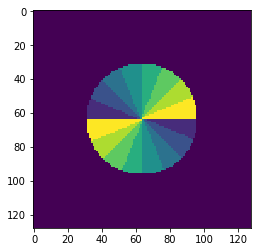

In [35]:
plt.imshow(wedge_adjacency(128, 32, 8, True))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


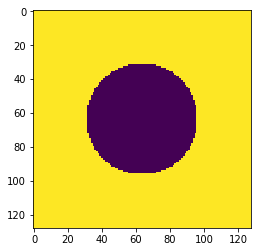

In [37]:
x = np.zeros((s, s, 4)).astype(np.uint8)
surface = cairo.ImageSurface.create_for_data(
    x, cairo.FORMAT_ARGB32, s, s)
cr = cairo.Context(surface)
cr.set_source_rgba(0, 0, 0, 1.0)
cr.move_to(s//2, s//2)
cr.arc(s//2, s//2, r, 0, 2 * np.pi)
cr.close_path()
cr.fill()
non_wedge = (x[:, :, 3] == 0).astype(np.float32)
plt.imshow(non_wedge)
print(non_wedge)

In [38]:
non_wedge[64, 64]

0.0

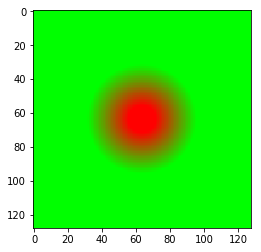

In [44]:
x = np.zeros((s, s, 4)).astype(np.uint8)
surface = cairo.ImageSurface.create_for_data(
    x, cairo.FORMAT_ARGB32, s, s)
cr = cairo.Context(surface)
r1 = cairo.RadialGradient(s // 2, s // 2, r // 4, s // 2, s // 2, r)
r1.add_color_stop_rgba(0, 1, 0, 0, 1)
r1.add_color_stop_rgba(1, 0, 1, 0, 1)
cr.set_source(r1)
cr.move_to(s//2, s//2)
cr.arc(s//2, s//2, 5 * r, 0, 2 * np.pi)
cr.close_path()
cr.fill()
plt.imshow(x.astype(np.float32)[:, :, [2, 1, 0, 3]] / 255)